In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing and scaling handwritten digits dataset
from tensorflow import keras

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape( len(X_test), 28*28)

X_train_flat = X_train_flat / 255
X_test_flat = X_test_flat / 255

In [34]:
class My_Neural_network:
    
    def __init__ (self,units,input_shape):
        self.units = units
        self.input_shape = input_shape
        self.weights = self.xavier_initializer(input_shape,units)
        self.biases = np.zeros(units)
        
    def xavier_initializer(self,input_dim, output_dim):
        limit = np.sqrt(6 / (input_dim + output_dim))
        return np.random.uniform(-limit, limit, (input_dim, output_dim))
    
    def fit(self, x_train, y_train, epochs=5, learning_rate=0.001):
        self.length = len(x_train)
        self.y_encoded = np.eye(self.units)[y_train]
        self.y_train = y_train
        self.graph =[]
        
        self.prediction_matrix = np.dot(x_train,self.weights)
        self.prediction_matrix = self.prediction_matrix + self.biases
        self.prediction_matrix = self.sigmoid(self.prediction_matrix)
        
        for i in range(epochs):
            self.prediction_matrix = np.dot(x_train,self.weights)
            self.prediction_matrix = self.prediction_matrix + self.biases
            self.prediction_matrix = self.sigmoid(self.prediction_matrix)
            
            self.graph.append(self.loss_calculation())
            if (i+1)%50 == 0:
                print(f"Epoch- {i+1}   Loss- {self.loss_calculation()}" )

            temp = (self.prediction_matrix - self.y_encoded) * self.prediction_matrix * (1 - self.prediction_matrix)

            w_gradients = np.dot( x_train.T, temp ) / self.length
            self.weights = self.weights - (learning_rate * w_gradients)

            b_gradients = np.mean(temp, axis=0)
            self.biases = self.biases - (learning_rate * b_gradients)
        
    def loss_calculation(self):
        total_loss=0
        for i in range(self.length):
            total_loss += self.cross_entropy(self.prediction_matrix[i],self.y_train[i])
            
        return total_loss / self.length
        
        
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def cross_entropy(self, prediction_matrix_value, y_train_value):
        epsilon = 1e-6
        return -np.log( prediction_matrix_value[y_train_value] + epsilon)
    
    def predict(self, x_test):
        self.predicted_matrix = np.dot(x_test,self.weights)
        self.predicted_matrix = self.predicted_matrix + self.biases
        self.predicted_matrix = self.sigmoid(self.predicted_matrix)
        return self.predicted_matrix
    
    def accuracy_score(self,predicted_matrix,y_test):
        correct = 0
        for i in range(len(predicted_matrix)):
            if y_test[i] == np.argmax(predicted_matrix[i]):
                correct += 1
                
        return correct/len(predicted_matrix)
    

In [111]:
model = My_Neural_network(10, input_shape=784)

In [112]:
model.weights.shape

(784, 10)

In [113]:
model.fit(X_train_flat, y_train, epochs=300, learning_rate=1)

Epoch- 50   Loss- 0.735736289856741
Epoch- 100   Loss- 0.6181254166747847
Epoch- 150   Loss- 0.5755904761809395
Epoch- 200   Loss- 0.5518304417057868
Epoch- 250   Loss- 0.5362629682734618
Epoch- 300   Loss- 0.5250892121478391


In [114]:
predicred = model.predict(X_test_flat)

In [115]:
model.accuracy_score(predicred,y_test)

0.8921

In [116]:
x = np.arange(1,301)

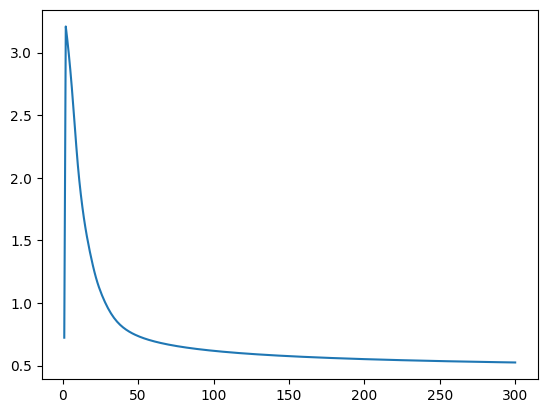

In [117]:
plt.plot(x,model.graph)

In [118]:
model.graph[:10]

[0.7231080436452871,
 3.2082397103056812,
 3.1045823559502495,
 2.989736421192124,
 2.8624411289447114,
 2.7219882171403302,
 2.569221653759113,
 2.408207498882303,
 2.2480929940971537,
 2.1015351820109918]

In [119]:
model2 = My_Neural_network(10, input_shape=784)

In [120]:
model2.fit(X_train_flat, y_train, epochs=300, learning_rate=0.1)

Epoch- 50   Loss- 1.63042063964812
Epoch- 100   Loss- 1.303900096193044
Epoch- 150   Loss- 1.1041011656142175
Epoch- 200   Loss- 0.9733473214079
Epoch- 250   Loss- 0.8814155635582382
Epoch- 300   Loss- 0.8208310700922452


In [121]:
predicred2 = model2.predict(X_test_flat)
model2.accuracy_score(predicred2,y_test)

0.8244

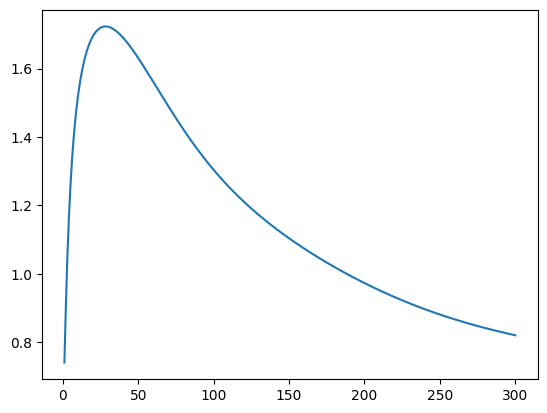

In [122]:
plt.plot(x,model2.graph)

In [103]:
model2.graph[:5]

[0.7591249550863348,
 6.208473264255862,
 6.172945839005111,
 6.135963442566801,
 6.097365350780319]

In [124]:
model3 = My_Neural_network(10, input_shape=784)
model3.fit(X_train_flat, y_train, epochs=300, learning_rate=0.01)

Epoch- 50   Loss- 1.2597146761172655
Epoch- 100   Loss- 1.5058354062998642
Epoch- 150   Loss- 1.6212212723333594
Epoch- 200   Loss- 1.6769891184374661
Epoch- 250   Loss- 1.6995420314666727
Epoch- 300   Loss- 1.7016062586686487


In [125]:
predicred3 = model3.predict(X_test_flat)
model3.accuracy_score(predicred2,y_test)

0.8244

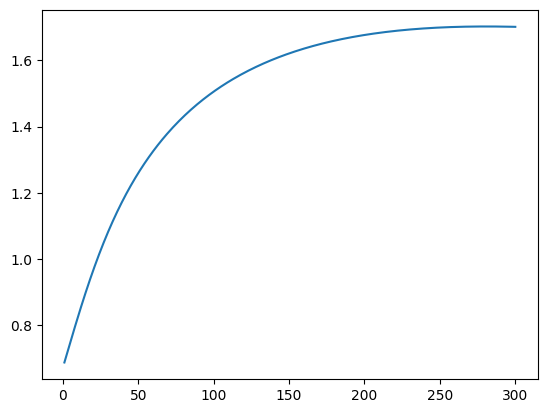

In [126]:
plt.plot(x,model3.graph)